# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set()

# Load the data

In [2]:
raw_data=pd.read_csv('2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [3]:
data=raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data['Gender']=data['Gender'].map({'Female':1,'Male':0})

In [4]:
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


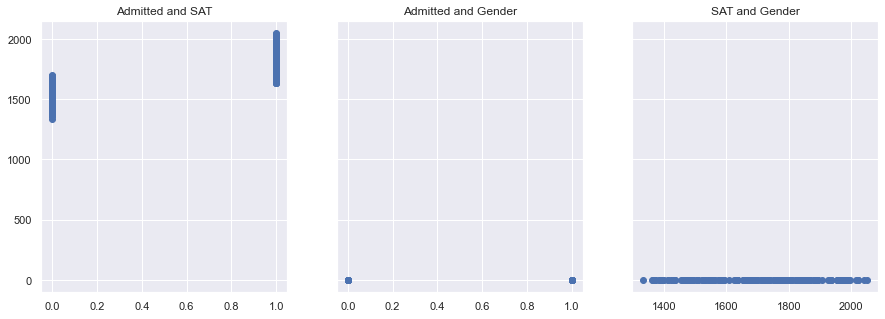

In [50]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(data['Admitted'],data['SAT'])
ax1.set_title('Admitted and SAT')

ax2.scatter(data['Admitted'],data['Gender'])
ax2.set_title('Admitted and Gender')

ax3.scatter(data['SAT'],data['Gender'])
ax3.set_title('SAT and Gender')

plt.show()

# Declare the dependent and the independent variables

In [11]:
y=data['Admitted']
x1=data[['SAT','Gender']]

# Regression

In [6]:
x=sm.add_constant(x1)
reg_log= sm.Logit(y,x)
results_log=reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Jan 2021   Pseudo R-squ.:                  0.8249
Time:                        00:45:11   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [12]:
np.exp(1.9449)

6.992932526814459

# Accuracy

In [13]:
np.set_printoptions(formatter={'float':lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [14]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [15]:
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [16]:
cm_df=pd.DataFrame(results_log.pred_table())
cm_df.columns=['Predicted 0','Predicted 1']
cm_df=cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


Heatmap

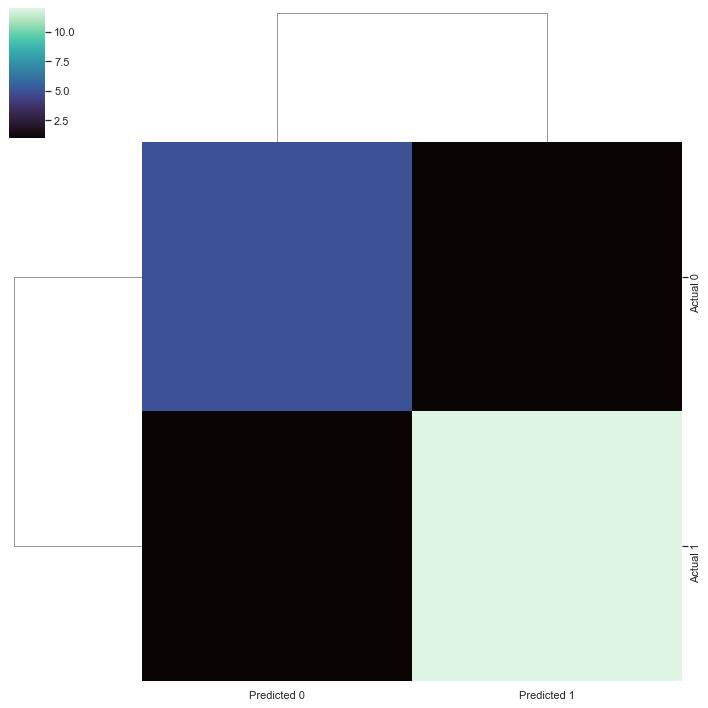

In [37]:
sns.clustemap(cm_df,cmap='mako')

In [17]:
cm=np.array(cm_df)
accuracy_train=(cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

# Testing the model and assessing its accuracy

In [19]:
test=pd.read_csv('2.03. Test dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [20]:
test['Admitted']=test['Admitted'].map({'Yes':1,'No':0})
test['Gender']=test['Gender'].map({'Female':1,'Male':0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [21]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [22]:
test_actual=test['Admitted']
test_data=test.drop(['Admitted'],axis=1)
test_data= sm.add_constant(test_data)
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [23]:
def confusion_matrix(data,actual_values,model):
    
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy

In [24]:
cm = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [25]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [35]:
print ('Missclassification rate: '+str((1+1)/19))

Missclassification rate: 0.10526315789473684
